In [1]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

/home/vco/Projects/pm4py-dcr4py/notebooks
/home/vco/Projects/pm4py-dcr4py


In [5]:
from pm4py import DcrGraph
graph = DcrGraph()
graph.events.add("A")
graph.events.add("B")
graph.events.add("C")
graph.events.add("D")
graph.labels.add("activity1")
graph.labels.add("activity2")
graph.labels.add("activity3")
graph.labels.add("activity4")
graph.label_map["activity1"] = {"A"}
graph.label_map["activity2"] = {"B"}
graph.label_map["activity3"] = {"C"}
graph.label_map["activity4"] = {"D"}
graph.conditions["A"] = set("B")
graph.conditions["B"] = set("C")
graph.responses["A"] = set("C")
graph.excludes["C"] = set("B")
graph.conditions["A"].add("D")
graph.includes["A"] = set("C")
graph.marking.included.add("A")
graph.marking.included.add("B")
graph.marking.included.add("C")
graph.marking.included.add("D")
print(graph)

events: {'D', 'C', 'B', 'A'}
marking: {executed: set(), included: {'D', 'C', 'B', 'A'}, pending: set()}
labels: {'activity2', 'activity4', 'activity3', 'activity1'}
conditionsFor: {'A': {'D', 'B'}, 'B': {'C'}}
responseTo: {'A': {'C'}}
includesTo: {'A': {'C'}}
excludesTo: {'C': {'B'}}
labelMap: {'activity1': {'A'}, 'activity2': {'B'}, 'activity3': {'C'}, 'activity4': {'D'}}



In [11]:
import pm4py
net, im, fm = pm4py.convert_to_petri_net(graph,preoptimize=True,postoptimize=True,debug=False)
net

places: [ executed_C, executed_D, included_B, pending_C ]
transitions: [ (event_A1, 'event_A1_label'), (event_A3, 'event_A3_label'), (event_C0, 'event_C0_label'), (event_D0, 'event_D0_label'), (init_C1, 'init_C1_label'), (init_D0, 'init_D0_label'), (pend_C0, 'pend_C0_label') ]
arcs: [ (event_A1, 'event_A1_label')->executed_D, (event_A1, 'event_A1_label')->pending_C, (event_A3, 'event_A3_label')->executed_D, (event_A3, 'event_A3_label')->pending_C, (event_C0, 'event_C0_label')->executed_C, (event_D0, 'event_D0_label')->executed_D, (init_C1, 'init_C1_label')->executed_C, (init_D0, 'init_D0_label')->executed_D, (pend_C0, 'pend_C0_label')->executed_C, executed_C->(event_C0, 'event_C0_label'), executed_C->(init_C1, 'init_C1_label'), executed_C->(pend_C0, 'pend_C0_label'), executed_D->(event_A1, 'event_A1_label'), executed_D->(event_A3, 'event_A3_label'), executed_D->(event_D0, 'event_D0_label'), executed_D->(init_D0, 'init_D0_label'), included_B->(event_A1, 'event_A1_label'), included_B->(e

In [7]:
from pm4py.read import read_dcr_xml
example = 'notebooks/debug.xml'
dcr = read_dcr_xml(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
net, im, fm = pm4py.convert_to_petri_net(dcr,debug=True,preoptimize=True,postoptimize=True)
net

Exception: File does not exist

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

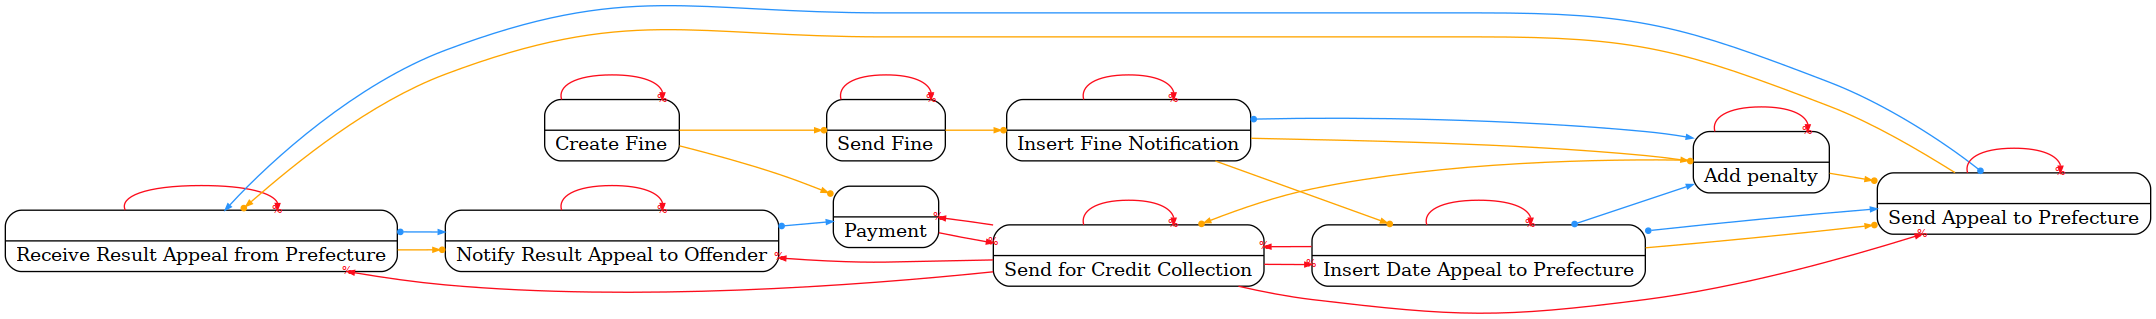

[i] preoptimizing
[i] finding exceptional behaviour
[i] mapping events
[i] map constraining relations
[i] map effect relations
[i] handle all relation exceptions
[i] post optimizing


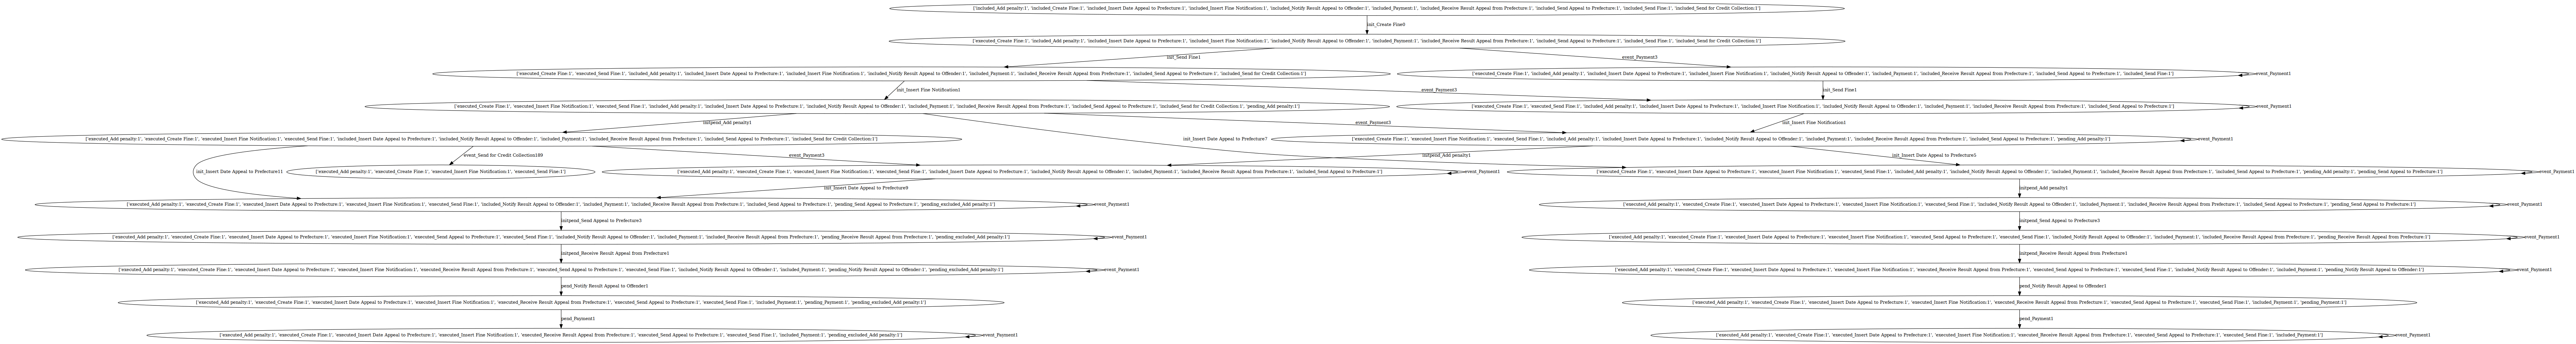

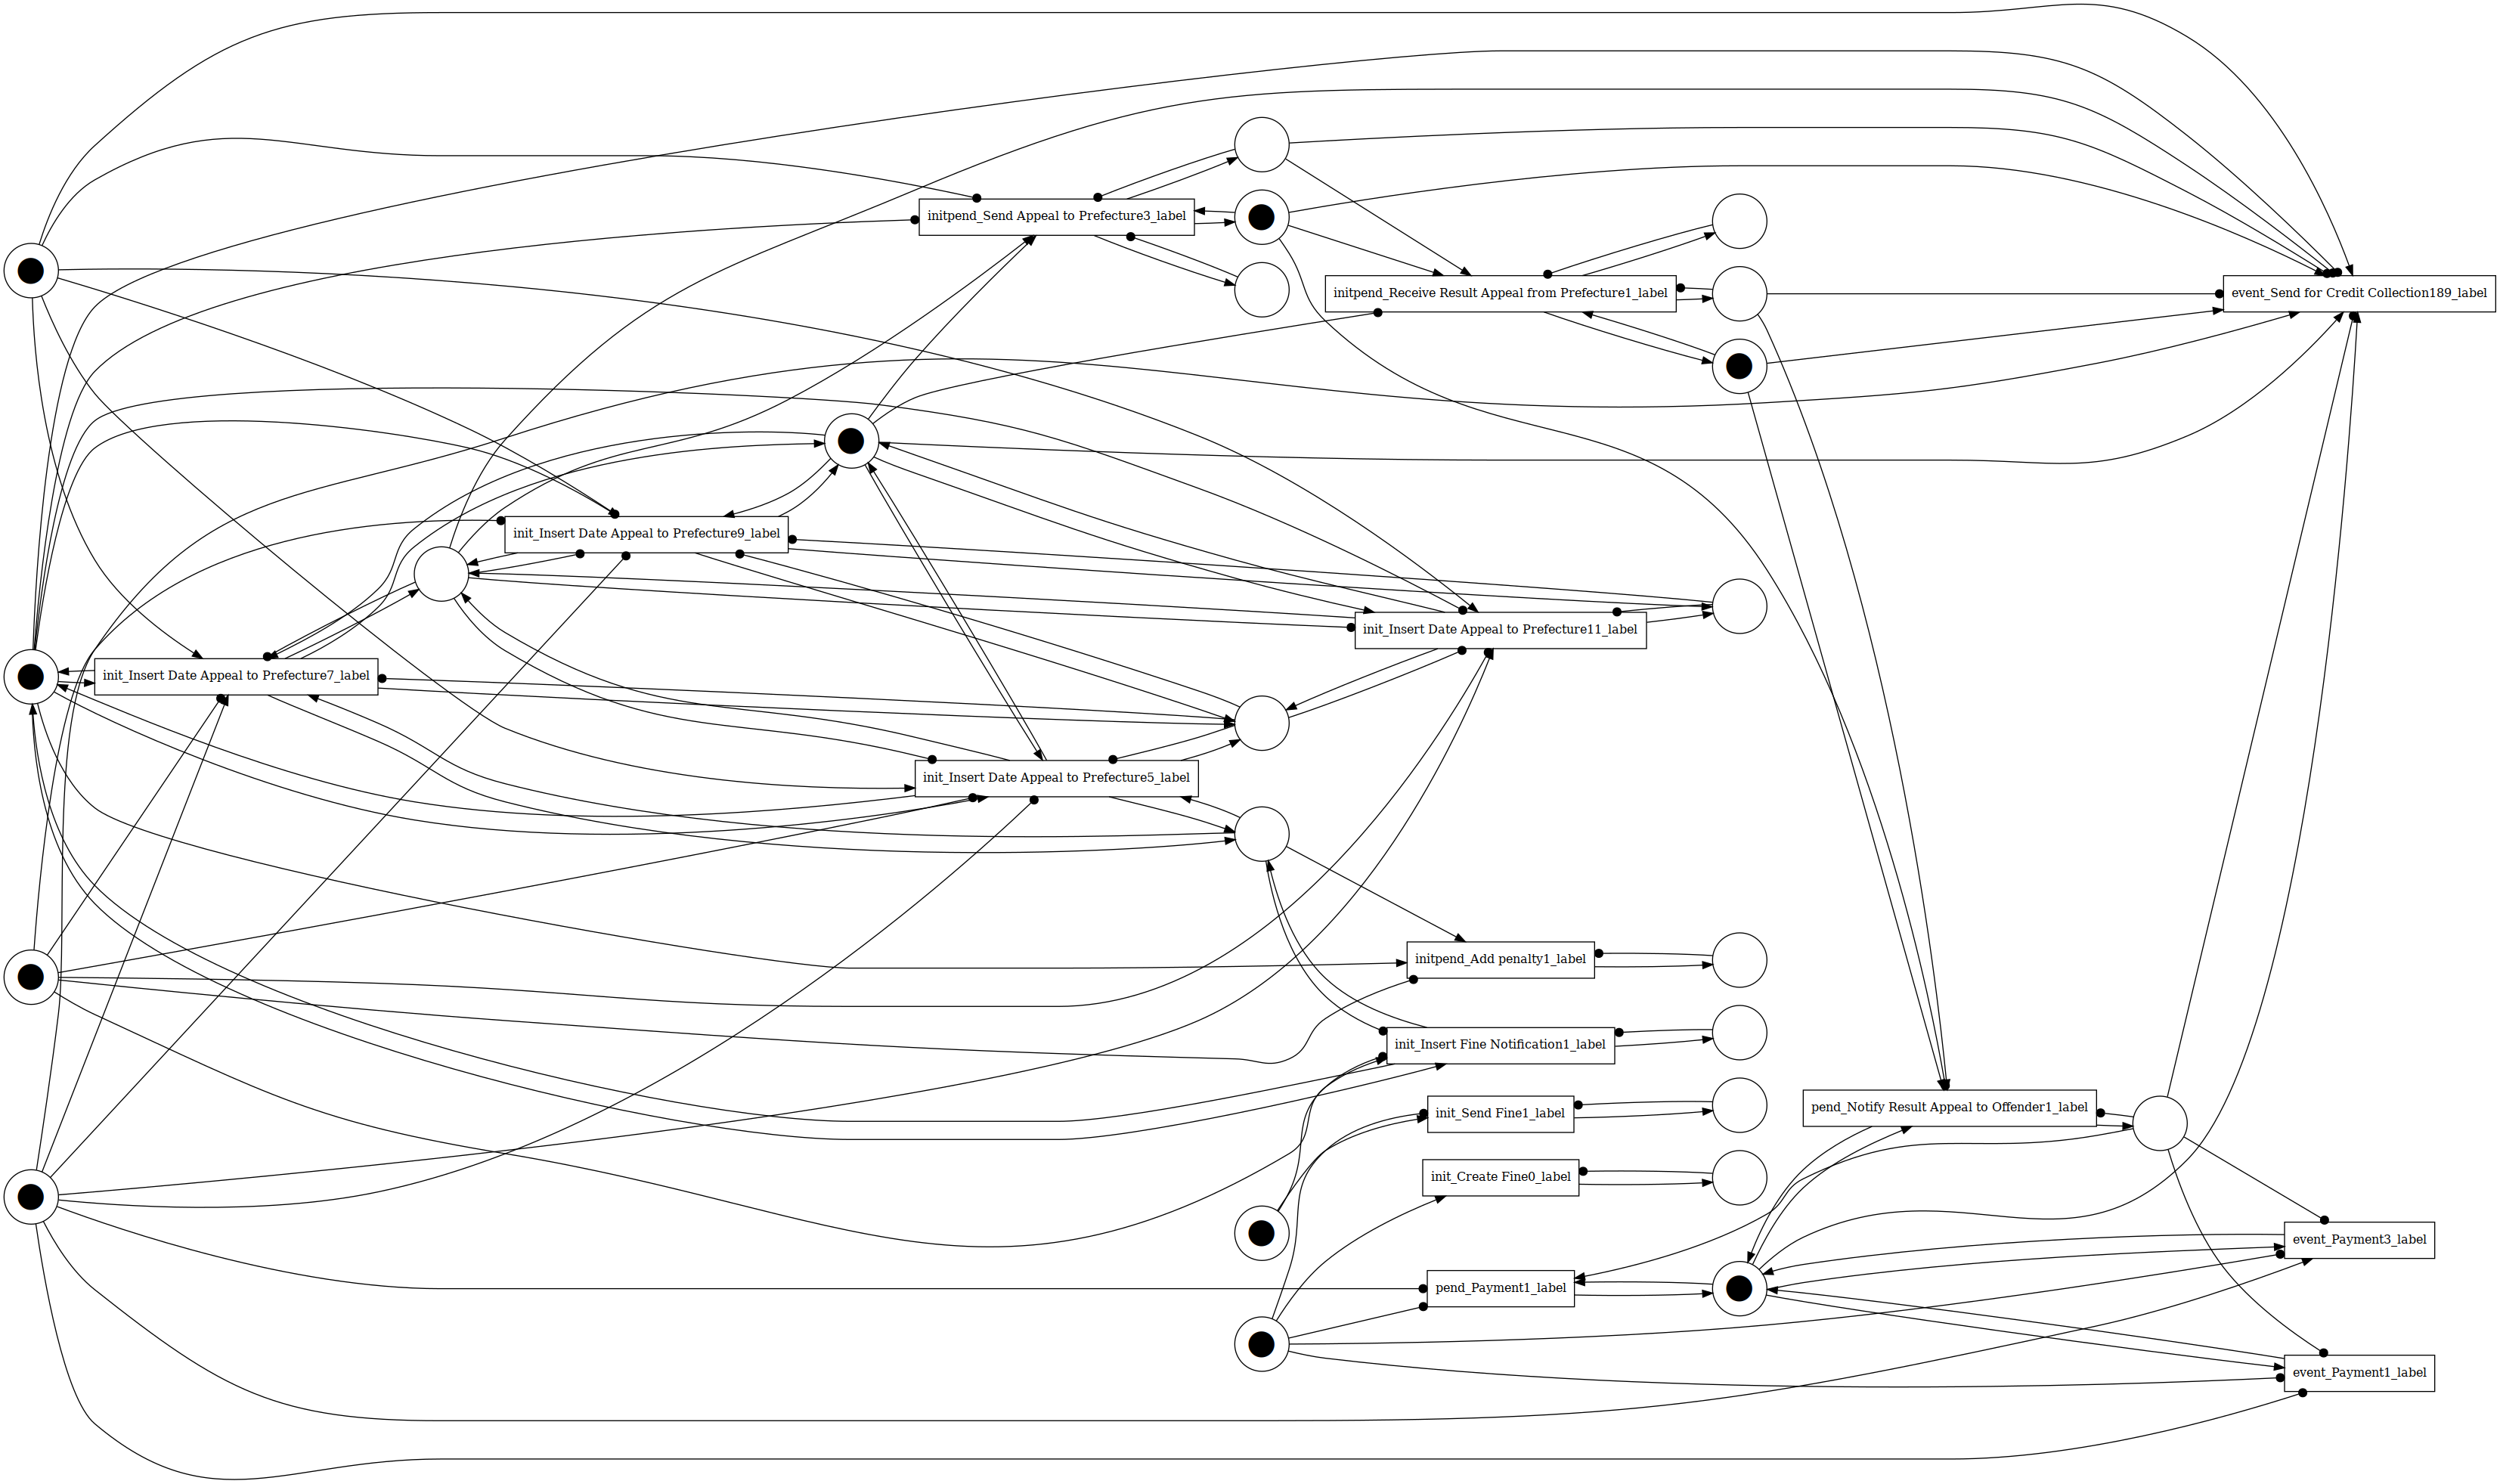

In [8]:
import pm4py
log = pm4py.read_xes("../tests/input_data/roadtraffic100traces.xes")
dcr, _ = pm4py.discover_dcr(log)
pm4py.view_dcr(dcr)
net, im, fm = pm4py.convert_to_petri_net(dcr,debug=True,preoptimize=True,postoptimize=True)
pm4py.view_petri_net(net,im,fm)